In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Books2.csv')
df

,Unnamed: 0,Title,Genre,Author,Pages,Publish_Date,language,Num_Reviews,Num_Ratings,Rating
0,0,Ways of Seeing,art,John Berger,176.0,1990.0,English,1912.0,302885.0,3.90
1,1,The Story of Art,art,E.H. Gombrich,688.0,1995.0,English,1102.0,355674.0,3.95
2,2,The New Drawing on the Right Side of the Brain,art,Betty Edwards,291.0,1999.0,English,858.0,321756.0,3.87
3,3,Steal Like an Artist: 10 Things Nobody Told Yo...,art,Austin Kleon,160.0,2012.0,English,6940.0,238078.0,3.95
4,4,Wall and Piece,art,Banksy,240.0,2006.0,English,893.0,214249.0,3.85
...,...,...,...,...,...,...,...,...,...,...
9589,9589,NaN,history,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9590,9590,Killing England: The Brutal Struggle for Ameri...,history,Bill O'Reilly,340.0,2017.0,English,1018.0,12792.0,4.23
9591,9591,Sophie's World,history,Jostein Gaarder,403.0,1995.0,English,12616.0,226843.0,3.95
9592,9592,The Creation of Anne Boleyn: A New Look at Eng...,history,Susan Bordo,343.0,2013.0,English,426.0,2703.0,3.86


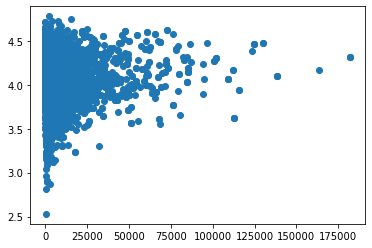

In [3]:
plt.scatter(df.Num_Reviews, df.Rating)

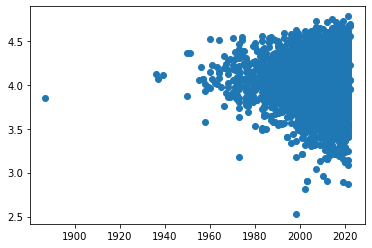

In [4]:
plt.scatter(df.Publish_Date, df.Rating)

In [5]:
#Basic initial cleaning of missing values and duplicated rows
df.dropna(inplace=True)
df.drop_duplicates(keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9165 entries, 0 to 9593
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9165 non-null   int64  
 1   Title         9165 non-null   object 
 2   Genre         9165 non-null   object 
 3   Author        9165 non-null   object 
 4   Pages         9165 non-null   float64
 5   Publish_Date  9165 non-null   float64
 6   language      9165 non-null   object 
 7   Num_Reviews   9165 non-null   float64
 8   Num_Ratings   9165 non-null   float64
 9   Rating        9165 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 787.6+ KB


In [6]:
#Checking the number of unique books 
df['Title'].describe()

count              9165
unique             7762
top       The Historian
freq                  4
Name: Title, dtype: object

In [7]:
#deleting all the unnecessary duplicated books
df.drop_duplicates(subset=['Title'], keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7762 entries, 0 to 9593
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    7762 non-null   int64  
 1   Title         7762 non-null   object 
 2   Genre         7762 non-null   object 
 3   Author        7762 non-null   object 
 4   Pages         7762 non-null   float64
 5   Publish_Date  7762 non-null   float64
 6   language      7762 non-null   object 
 7   Num_Reviews   7762 non-null   float64
 8   Num_Ratings   7762 non-null   float64
 9   Rating        7762 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 667.0+ KB


In [8]:
#converting some of the string values to numeric values
df['Num_Reviews'] = df['Num_Reviews'].astype(int)
df['Num_Ratings'] = df['Num_Ratings'].astype(int)
df['Rating'] = df['Rating'].astype(float)

In [9]:
df['language'].unique()

array(['English', 'German', 'Multiple languages', 'Dutch', 'French',
       'Spanish', 'Arabic', 'Polish', 'Japanese', 'Swedish', 'Danish',
       'Icelandic'], dtype=object)

In [10]:
#deleting irrelevant values
#Originally also had these values (accedentaly deleted them and replaced the file before)

df = df[df['language'] != '']
df = df[df['language'] != 'Multiple languages']

In [11]:
df['language'].unique()

array(['English', 'German', 'Dutch', 'French', 'Spanish', 'Arabic',
       'Polish', 'Japanese', 'Swedish', 'Danish', 'Icelandic'],
      dtype=object)

In [12]:
language_replace_map = {'English':1, 'German':2, 'Dutch':3, 'French':4, 'Spanish':5, 'Arabic':6, 'Polish':7, 'Japanese':8, 
              'Swedish':9, 'Danish':10, 'Icelandic':11}

df.replace(language_replace_map, inplace=True)

In [13]:
df['language'].describe()
#The majority of the books are written in English as excpected

count    7761.000000
mean        1.030666
std         0.437999
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: language, dtype: float64

In [14]:
#Giving all the authors unique numeric values (by their last appearance in the DataFrame)
replace_map_authors = {}
i = 1
for author in df['Author']:
    replace_map_authors[author] = i
    i += 1

df.replace(replace_map_authors, inplace=True)

In [15]:
df['Author']

0        675
1       6847
2        233
3         30
4        686
        ... 
9588    7757
9590    7758
9591    7759
9592    7760
9593    7761
Name: Author, Length: 7761, dtype: int64

In [16]:
#Giving the genres numeric values (1-8)
genre_replace_map = {'art':1, 'romance':2, 'fantasy':3, 'horror':4, 'crime':5, 'science':6,
       'mystery':7, 'history':8}

df.replace(genre_replace_map, inplace=True)

In [17]:
#Deleting outliers
mycols = ["Publish_Date","Num_Reviews", "Num_Ratings", "Rating"]
for col in mycols:        
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        IQR_range = 1.5 * IQR
        
        df[col][(df[col] < Q1 - IQR_range) | (df[col] > Q3 + IQR_range)] = np.nan

<ipython-input-17-82847724dbd2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][(df[col] < Q1 - IQR_range) | (df[col] > Q3 + IQR_range)] = np.nan
<ipython-input-17-82847724dbd2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][(df[col] < Q1 - IQR_range) | (df[col] > Q3 + IQR_range)] = np.nan
<ipython-input-17-82847724dbd2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][(df[col] < Q1 - IQR_range) | (df[col] > 

In [18]:
df.dropna(inplace=True)

In [30]:
df = df.drop(columns=['Unnamed: 0'])

In [31]:
df

,Title,Genre,Author,Pages,Publish_Date,language,Num_Reviews,Num_Ratings,Rating
5,The Artist's Way: A Spiritual Path to Higher C...,1,1047,237.0,2002.0,1,3289.0,102075.0,3.92
6,Art and Fear: Observations on the Perils (and ...,1,7,122.0,2001.0,1,1171.0,79099.0,3.75
9,The Letters of Vincent van Gogh,1,1044,528.0,1997.0,1,454.0,83806.0,4.07
11,Seven Days in the Art World,1,340,320.0,2009.0,1,732.0,60606.0,3.61
13,History of Beauty,1,6663,432.0,2004.0,1,303.0,55948.0,3.82
...,...,...,...,...,...,...,...,...,...
9587,Spice: The History of a Temptation,8,7756,384.0,2005.0,1,183.0,2378.0,3.64
9588,"American Slavery, American Freedom",8,7757,464.0,2003.0,1,128.0,3337.0,4.12
9590,Killing England: The Brutal Struggle for Ameri...,8,7758,340.0,2017.0,1,1018.0,12792.0,4.23
9592,The Creation of Anne Boleyn: A New Look at Eng...,8,7760,343.0,2013.0,1,426.0,2703.0,3.86


In [21]:
df.to_csv('books_final.csv', index=False)

<AxesSubplot:ylabel='language'>

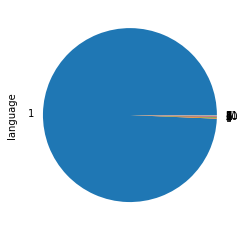

In [22]:
df['language'].value_counts().plot(kind = "pie")

<AxesSubplot:>

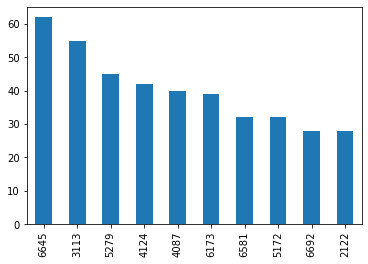

In [23]:
df['Author'].value_counts().head(10).plot(kind = "bar")

(array([ 542., 2543., 2719.,  553.]),
 array([3.43  , 3.7275, 4.025 , 4.3225, 4.62  ]),
 <BarContainer object of 4 artists>)

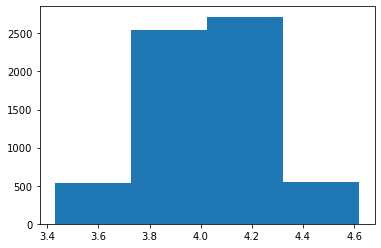

In [24]:
plt.hist(df['Rating'], bins=4)

(array([ 342.,  663., 1915., 1981., 1456.]),
 array([1987., 1994., 2001., 2008., 2015., 2022.]),
 <BarContainer object of 5 artists>)

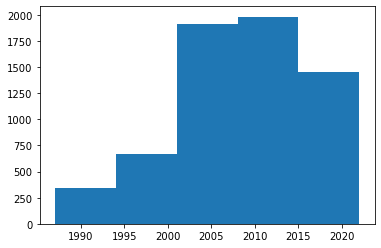

In [25]:
plt.hist(df['Publish_Date'], bins=5)

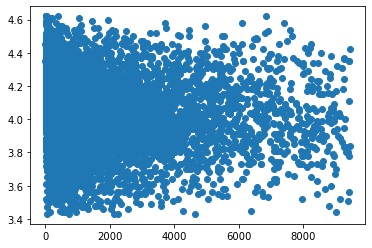

In [26]:
plt.scatter(df.Num_Reviews, df.Rating)

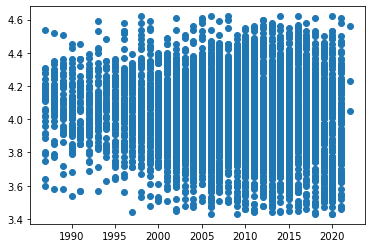

In [27]:
plt.scatter(df.Publish_Date, df.Rating)

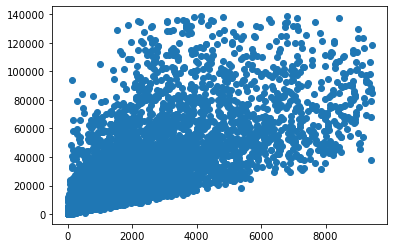

In [28]:
plt.scatter(df.Num_Reviews, df.Num_Ratings)

<AxesSubplot:>

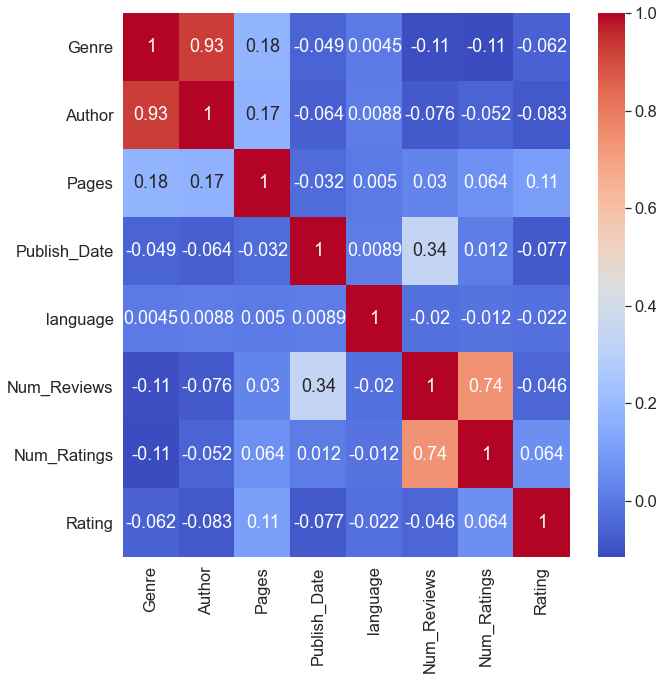

In [29]:
# in order to to that, we gonna use our numeric dataframe
df_numeric = df.drop(columns=['Title', 'Unnamed: 0'])
plt.figure(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')